Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

#Strojno učenje
<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

#Laboratorijska vježba 1: Procjena parametara i Bayesov klasifikator

(c) 2015 Jan Šnajder

*Verzija 0.3*

Objavljeno: **27. listopada 2015.**<br>
Rok za predaju: **1. studenog 2015.**


Vježba se sastoji od više zadataka grupiranih u tri teme. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg koda te evaluiranja ćelija. Odgovore na pitanja **nemojte pisati** u bilježnicu koju ćete demonstrirati asistentu (kako ih pri predaji ne bi samo čitali).

Molim vas, osigurajte se da u potpunosti **razumijete** kod koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta preinačiti i ponovno evaluirati Vaš kod. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Stoga se nemojte ograničiti samo na to da riješite zadatak, već slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [3]:
# Učitaj osnovne biblioteke...
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

/Users/filipzelic/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


# 1. Procjena parametara

### 1.1

Definirajte funkciju izglednosti $\mathcal{L}(\mu|\mathcal{D})$ za skup $\mathcal{D}=\{x^{(i)}\}_{i=1}^N$ Bernoullijevih varijabli. Neka od $N$ varijabli njih $m$ ima vrijednost 1 (npr. od $N$ bacanja novčića, $m$ puta smo dobili glavu). Definirajte funkciju izglednosti tako da je parametrizirana s $N$ i $m$, dakle definirajte funkciju $\mathcal{L}(\mu|N,m)$. 

In [4]:
def LikelihoodFunction(mi,m,N):
    return pow(mi,m)*pow((1-mi),(N-m))

### 1.2

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za (1) $N=10$ i $m=1,2,5,9$ te za (2) $N=100$ i $m=1,10,50,90$ (dva zasebna grafikona).

**Q:** Koja vrijednost odgovara ML-procjenama i zašto?

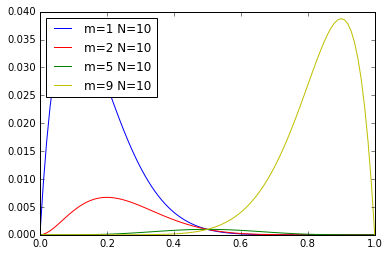

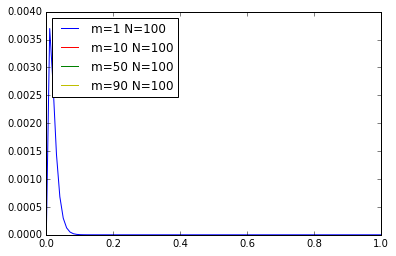

In [5]:
mi = linspace(0,1,100)
plt.plot(mi, LikelihoodFunction(mi, 1, 10), 'b-', label='m=1 N=10')
plt.plot(mi, LikelihoodFunction(mi, 2, 10), 'r-', label='m=2 N=10')
plt.plot(mi, LikelihoodFunction(mi, 5, 10), 'g-', label='m=5 N=10')
plt.plot(mi, LikelihoodFunction(mi, 9, 10), 'y-', label='m=9 N=10')
plt.legend(loc ='upper left')
plt.show()

plt.plot(mi, LikelihoodFunction(mi, 1, 100), 'b-', label='m=1 N=100')
plt.plot(mi, LikelihoodFunction(mi, 10, 100), 'r-', label='m=10 N=100')
plt.plot(mi, LikelihoodFunction(mi, 50, 100), 'g-', label='m=50 N=100')
plt.plot(mi, LikelihoodFunction(mi, 90, 100), 'y-', label='m=90 N=100')
plt.legend(loc ='upper left')
plt.show()

# Zbog skaliranja grafa ne prikazuje male vrijednosti
# Zamjeniti 1 s 10 
# Vrijednost mi odgovara ML-procjenama m=2 -> mi=0.2 m=5 -> mi =0.5
# mi_ML = 1/N suma(i do N)*x
# Najizglednija procjena za mi je relativna frekvencija događaja u uzorku

### 1.3

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za $N=10$ i $m=\{0,9\}$.

**Q:** Koja je ML-procjena za $\mu$ i što je problem s takvom procjenom u ovome slučaju?

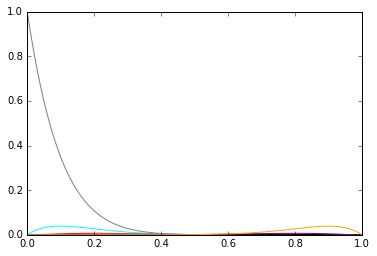

In [6]:
mi = linspace(0,1,100)
color = ['gray', 'cyan','red','aquamarine','azure','blue','green','black','purple','orange']
for i in range(0,10):
    plt.plot(mi, LikelihoodFunction(mi, i, 10), color[i])
    
# Najizglednija procjena za mi je srednja vrijednost uzorka
# Problem je prenaučenost za primjer sve glave ili sva pisma 
#Na primjer, za uzorak za koji x
#x_i = 1, najizglednija procjena je mi_ML = 1, što dovodi do prenaučenosti modela

### 1.4

Prikažite beta-distribuciju $B(\mu|\alpha,\beta)$ za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

**Q:** Koje parametere biste odabrali za modeliranje apriornog znanja o parametru $\mu$ za novčić za koji mislite da je "donekle pravedan, ali malo češće pada na glavu"? Koje biste parametre odabrali za novčić za koji držite da je posve pravedan? Zašto uopće koristimo beta-distribuciju, a ne neku drugu?

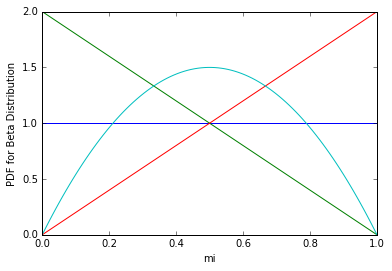

In [7]:
from scipy import stats
mi = linspace(0,1,100)
color ='rgby'

for i in range(1,3):
    for j in range(1,3):
        plt.plot(mi, sp.stats.beta.pdf(mi, i, j))
        
plt.xlabel('mi')
plt.ylabel('PDF for Beta Distribution')
plt.show()

# https://en.wikipedia.org/wiki/Beta_distribution 
# beta distribucija -> apriori očekivanje = a / (a+b)
# Malo veći alfa da novčić pada više na glavu 
# Za pravedan novčić -> a=b
# Beta distribucija 

### 1.5

Definirajte funkciju za izračun zajedničke vjerojatnosti $P(\mu,\mathcal{D}) = P(\mathcal{D}|\mu) \cdot P(\mu|\alpha,\beta)$ te prikažite tu funkciju za gornje kombinacije parametara $N$ i $m$ i neke odabrane $\alpha$ i $\beta$. 

***Q***: Koje vrijednosti odgovaraju MAP-procjeni za $\mu$? Usporedite ih sa ML-procjenama.

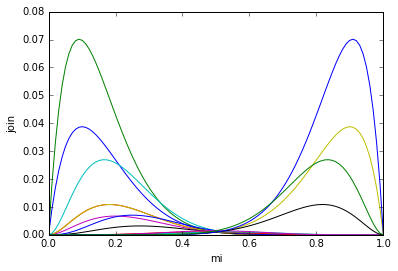

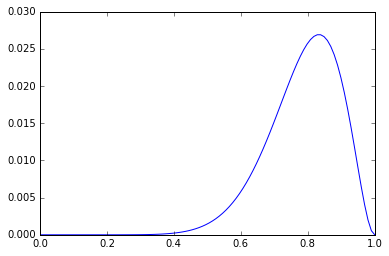

In [8]:
def joint(mi, m, N, alfa, beta):
    return LikelihoodFunction(mi, m, N)*sp.stats.beta.pdf(mi, alfa, beta)

N = 10
m_list = [1,2,5,9]
mi = linspace(0,1,100)
for m in m_list:
    for i in range(1,3):
        for j in range(1,3):
            plt.plot(mi, joint(mi, m, N, i, j))
        
plt.xlabel('mi')
plt.ylabel('join')
plt.show()

plt.plot(mi, joint(mi, 9, 10, 2, 2))

# Zaglađeni likelihood -> bolje od likelihooda samog jer nema onog problema s svim glavama  
# tj. nema prenaučenosti
# MAP -> MLE procjena uz uključeno prethodno znanje predviđanje o parametrima (ugraditi prethodno znanje o parametrima)

### 1.6

Za $N=10$ i $m=1$, na jednome grafikonu prikažite sve tri distribucije: $P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$.

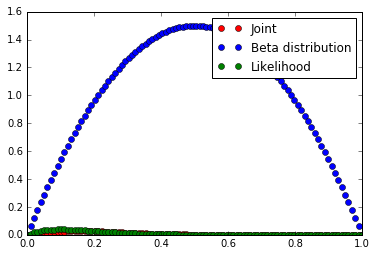

In [9]:
N = 10
m = 1 
mi = linspace(0,1,100)
alfa = 2
beta = 2
plt.plot(mi, joint(mi, m, N, alfa, beta), 'ro', label='Joint')
plt.plot(mi, stats.beta.pdf(mi, alfa , beta), 'bo', label='Beta distribution')
plt.plot(mi, LikelihoodFunction(mi, m, N), 'go', label='Likelihood')
plt.legend()
plt.show()

### 1.7

Pročitajte [ove](http://scikit-learn.org/stable/datasets/) upute o učitavanju oglednih skupova podataka u SciPy. Učitajte skup podataka *Iris*. Taj skup sadrži $n=4$ značajke i $K=3$ klase. Odaberite jednu klasu i odaberite sve primjere iz te klase, dok ostale primjere zanemarite (u nastavku radite samo s primjerima iz te jedne klase). Vizualizirajte podatke tako da načinite 2D-prikaze za svaki par značajki (šest grafikona; za prikaz je najjednostavnije koristiti funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)).

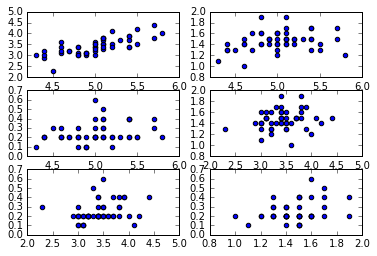

In [17]:
from sklearn import datasets
iris = datasets.load_iris()

class_1 = iris.data[iris.target == 0]
graph_number = 1

for i in range(0,4):
    for j in range(i+1,4):
        column_one = class_1[:,i]
        column_two = class_1[:,j]
        pair = np.column_stack((column_one, column_two))
        plt.subplot(3,2,graph_number)
        graph_number +=1

        plt.scatter(pair[:,0],pair[:,1])

### 1.8

Pogledajte opis modul [`stats`](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) te proučite funkciju [`norm`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm). Implementirajte funkciju log-izglednosti za parametre $\mu$ i $\sigma^2$ normalne distribucije.

In [11]:
def mi_ML(x):
    return np.sum(x)/len(x)

def sigma_ML(x, mi):
    return np.sum((x-mi)**2)/len(x)

def log_likelihood(x, mi, sigma):
        N = len(x)
        return (-N/2)*np.log(2*np.pi) - N*np.log(sigma) - np.sum((x-mi)**2)/(2*sigma**2)

def estimate(x):
    mi = mi_ML(x)
    sigma = sigma_ML(x, mi)
    return log_likelihood(x, mi, sigma)


### 1.9

Izračunajte ML-procjene za $(\mu, \sigma^2)$ za svaku od $n=4$ značajki iz skupa *Iris*. Ispišite log-izglednosti tih ML-procjena. 

**Q:** Možete li, na temelju dobivenih log-izglednosti, zaključiti koja se značajka najbolje pokorava normalnoj distribuciji? 

In [12]:
for i in range(4):
    print estimate(class_1[:,i])

-145.97859986
-124.162412205
-717.128188269
-2041.09997995


### 1.10

Proučite funkciju [`pearsonr`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.pearsonr.html) za izračun Pearsonovog koeficijenta korelacije. Izračunajte koeficijente korelacije između svih četiri značajki u skupu *Iris*. 

In [13]:
from scipy.stats.mstats import pearsonr 

for i in range(0,4):
    for j in range(i+1,4):
        column_one = class_1[:,i]
        column_two = class_1[:,j]
        pair = np.column_stack((column_one, column_two)) 
        print i, j, pearsonr(pair[:,0],pair[:,1])[0]

0 1 0.746780373264
0 2 0.263874092919
0 3 0.279091575
1 2 0.176694628697
1 3 0.279972888517
2 3 0.306308211158


### 1.11

Proučite funkciju [`cov`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) te izračunajte ML-procjenu za kovarijacijsku matricu za skup *Iris*. Usporedite pristranu i nepristranu procjenu. Pokažite da se razlika smanjuje s brojem primjera (npr. isprobajte za $N/4$ i $N/2$ i $N$ primjera).

In [14]:
IrisSetSize = len(iris.data)
N2 = IrisSetSize/2
N4 = IrisSetSize/4

pristran_N = np.cov(class_1, bias=1, rowvar=0) 
nepristran_N = np.cov(class_1, bias=0, rowvar=0)  
diff_N = np.abs(pristran_N - nepristran_N)

pristran_N2 = np.cov(class_1[0:N2], bias=1, rowvar=0) 
nepristran_N2 = np.cov(class_1[0:N2], bias=0, rowvar=0)  
diff_N2 = np.abs(pristran_N2 - nepristran_N2)

pristran_N4 = np.cov(class_1[0:N4,:], bias=1, rowvar=0) 
nepristran_N4 = np.cov(class_1[0:N4,:], bias=0, rowvar=0)  
diff_N4 = np.abs(pristran_N4 - nepristran_N4)

print diff_N
print diff_N2
print diff_N4

# Razlika pristranosti i nepristranosti se smanjuje kako se smanjuje broj primjera jer tada imamo manje primjera i 
# sama pristranost (udaljenost očekivanja procjenitelja do prave vrijednosti) je manja 

[[ 0.00248498  0.00200596  0.00032278  0.00021094]
 [ 0.00200596  0.00290359  0.00023363  0.00022873]
 [ 0.00032278  0.00023363  0.00060212  0.00011396]
 [ 0.00021094  0.00022873  0.00011396  0.00022988]]
[[ 0.00248498  0.00200596  0.00032278  0.00021094]
 [ 0.00200596  0.00290359  0.00023363  0.00022873]
 [ 0.00032278  0.00023363  0.00060212  0.00011396]
 [ 0.00021094  0.00022873  0.00011396  0.00022988]]
[[  3.50661472e-03   2.64223683e-03   3.03140979e-04   3.68273679e-04]
 [  2.64223683e-03   3.63890918e-03   1.56237318e-05   3.77607337e-04]
 [  3.03140979e-04   1.56237318e-05   8.44087331e-04   1.34526418e-04]
 [  3.68273679e-04   3.77607337e-04   1.34526418e-04   2.75545816e-04]]


### 1.12

Proučite funkciju [`multivariate_normal`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal). Definirajte funkciju koja vraća funkciju gustoće $P(x_1,x_2)$ za odabrane dvije značajke. Nacrtajte grafikone kontura (funkcija [`contour`](https://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#contour-plots)) za svih šest parova značajki.

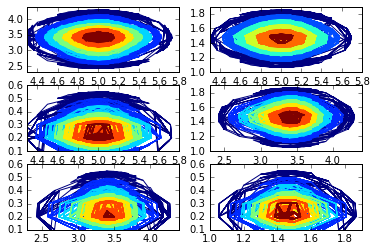

In [16]:
from scipy.stats import multivariate_normal

graph_number = 1
# 6 kombinacija značajki
for i in range(0,4):
    for j in range(i+1,4):
        column_one = class_1[:,i]
        column_two = class_1[:,j]
        mi = [np.mean(column_one), np.mean(column_two)]
        cov = [np.cov(column_one), np.cov(column_two)]        
        mnormal = multivariate_normal(mi, cov)
        X, Y = np.meshgrid(column_one, column_two)
        XY = np.dstack((X,Y))
        plt.subplot(3,2,graph_number)
        graph_number +=1
        plt.contour(X, Y, mnormal.pdf(XY))
        
# Funkcija gustoće za više varijabli -> multivarijatna (višedimenzijska) Gaussova razdioba

# 2. Bayesov klasifikator za diskretne značajke

### 2.1

Za demonstraciju rada Bayesovog klasifikatora sa diskretnim značajkama treba nam skup primjera sa diskretnim značajkama i oznakama klase. Jedan takav ogledni skup podataka jest *digits*:

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

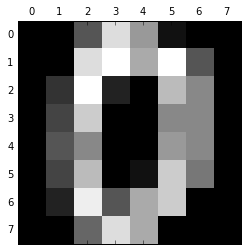

In [19]:
gray() 
matshow(digits.images[0])
show();

Svaki primjer je matrica dimenzija $8\times 8$:

In [20]:
shape(digits.images[0])

(8, 8)

In [21]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

Ako na ovom skupu želimo trenirati Bernoullijev naivni Bayesov klasifikator, značajke trebamo binarizirati. Proučite funkciju [`binarize`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.binarize.html) i binarizirajte skup podataka.

Na binariziranom skupu podataka možemo trenirati naš model. Naravno, da bismo mogli ispitati koliko dobro model radi, trebamo izdvojiti dio skupa za ispitivanje. Načinite podjelu skupa na 70% primjera za učenje i 30% primjera za ispitivanje.

In [22]:
from sklearn import preprocessing

# Binarizing digits data set 
binarizedDigits = []
for image in digits.data:
    binarizedDigits.extend(preprocessing.binarize(image, threshold=7))

binarizedDigits = np.array(binarizedDigits)
       
dataSet_size = digits.data.shape[0]
train_number = int(dataSet_size*0.7)

# Spliting data set in 70% / 30%
trainSet_image = binarizedDigits[0:train_number, :]
validationSet_image = binarizedDigits[train_number:,:]

/Users/filipzelic/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/filipzelic/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/filipzelic/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a

### 2.2

Pročitajte opis modula [`naive_bayes`](http://scikit-learn.org/stable/modules/naive_bayes.html). Za klasifikaciju primjera s diskretnim značajkama treba nam tzv. *Bernoullijev naivni Bayes*, implementiran funkcijom [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB]). Proučite tu funkciju. Trenirajte model na skupu *digits* (na skupu za treniranje).

In [23]:
from sklearn.naive_bayes import BernoulliNB

train_X = trainSet_image
train_Y = digits.target[0:train_number]
print train_X
validation_X = validationSet_image
validation_Y = digits.target[train_number:]

classificator_digits = BernoulliNB()
classificator_digits.fit(train_X, train_Y)

#key = 5
#print(classificator_digits.predict(X[key])), Y[key]

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### 2.3

Proučite modul [`metric`](http://scikit-learn.org/stable/modules/model_evaluation.html#prediction-error-metrics) za vrednovanje modela. Izračunajte točnost modela (mjera *Accuracy*) na skupu za treniranje i na skupu za ispitivanje.

**Q:** Je li odnos između tih dviju pogrešaka očekivan? Zašto?

In [24]:
from sklearn.metrics import accuracy_score
train_predict = classificator_digits.predict(train_X)
train_accuracy = accuracy_score(train_Y, train_predict)
print train_accuracy

validation_predict = classificator_digits.predict(validation_X)
validation_accuracy = accuracy_score(validation_Y, validation_predict)
print validation_accuracy

0.910898965792
0.859259259259


### 2.4

Trenirajte model bez zaglađivanja te izračunajte točnost takvog modela.

**Q:** U čemu je problem?

In [25]:
# Bez zaglađivanja alpha=0
# Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
# No smoothing leads to overfitting -> za neke piksele koje nije vidio u traning setu neće znati što s njima i klasificirat
# će ih krivo i to će jako utjecati na grešku predikcije

nb = BernoulliNB(alpha=0)
nb.fit(train_X, train_Y)

train_predict_noSmooth = nb.predict(train_X)
train_accuracy_noSmooth = accuracy_score(train_Y, train_predict_noSmooth)
print train_accuracy_noSmooth

validation_predict_noSmooth = nb.predict(validation_X)
validation_accuracy_noSmooth = accuracy_score(validation_Y, validation_predict_noSmooth)
print validation_accuracy_noSmooth

0.0994431185362
0.0981481481481


/Users/filipzelic/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
/Users/filipzelic/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


### 2.5

Općenito govoreći, što više primjera za učenje imamo na raspolaganju, to ćemo moći trenirati bolji model. Međutim, za svaki problem i svaki model postoji određen broj primjera nakon kojeg daljnje povećavanje skupa za učenje ne donosi velike dobitke. Uvid u to možemo dobiti skiciranjem krivulje učenja (engl. *learning curve*). Proučite funkciju [`learning_curve`](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html#sklearn.learning_curve.learning_curve) (ili sami implementirajte takvu funkciju) te prikažite krivulju učenja naivnog Bayesovog klasifikatora na skupu *digits*.

**Q:** Bi li koristilo da imamo veći skup primjera za učenje? Koliko veći?

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  1.  0.  0.]]
[0 1 2 ..., 8 9 8]


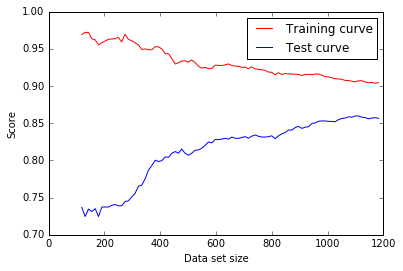

In [26]:
from sklearn import learning_curve

# np.arange(0.1,1,0.01) -> znači crta graf u 100 točaka tj. računa za 100 size-ova data seta
train_sizes, train_scores, test_scores = learning_curve.learning_curve(classificator_digits, binarizedDigits, digits.target, np.arange(0.1,1,0.01))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
print binarizedDigits
print digits.target
plt.plot(train_sizes, train_scores_mean, 'r', label = "Training curve")
plt.plot(train_sizes, test_scores_mean, 'b', label = "Test curve")
plt.xlabel('Data set size')
plt.ylabel('Score')
plt.legend()
plt.show()

# Za veći skup krivulje bi se mininmalno mijenjale u odnosu na one nakon veličine 1000

###2.6

<p style="color:red">
**TBD**
</p>

## 3. Bayesov klasifikator za kontinuirane značajke

### 3.1

Učitajte skup podataka *Iris* i podijelite ga skup za učenje i skup za provjeru u omjeru 70:30.

In [27]:
from sklearn import datasets
from sklearn.utils import shuffle 

iris = datasets.load_iris()
iris.data, iris.target = shuffle(iris.data, iris.target)
train = int(iris.data.shape[0]*0.7)

train_set_X = iris.data[0:train]
train_set_Y = iris.target[0:train]

validation_set_X = iris.data[train:]
validation_set_Y = iris.target[train:]

print train_set_X
print train_set_Y.shape

[[ 5.1  3.8  1.6  0.2]
 [ 5.7  2.8  4.5  1.3]
 [ 6.3  3.4  5.6  2.4]
 [ 6.6  3.   4.4  1.4]
 [ 6.3  2.9  5.6  1.8]
 [ 4.4  3.2  1.3  0.2]
 [ 5.7  2.8  4.1  1.3]
 [ 7.7  2.6  6.9  2.3]
 [ 6.8  2.8  4.8  1.4]
 [ 6.5  2.8  4.6  1.5]
 [ 5.6  2.8  4.9  2. ]
 [ 6.9  3.1  5.1  2.3]
 [ 4.9  3.1  1.5  0.1]
 [ 4.8  3.4  1.6  0.2]
 [ 5.8  2.7  5.1  1.9]
 [ 6.8  3.   5.5  2.1]
 [ 6.4  2.7  5.3  1.9]
 [ 6.   2.2  4.   1. ]
 [ 5.7  2.9  4.2  1.3]
 [ 4.9  2.5  4.5  1.7]
 [ 5.1  3.5  1.4  0.3]
 [ 6.3  2.8  5.1  1.5]
 [ 5.9  3.   5.1  1.8]
 [ 4.9  3.1  1.5  0.1]
 [ 6.1  2.8  4.   1.3]
 [ 6.4  2.8  5.6  2.1]
 [ 5.4  3.   4.5  1.5]
 [ 6.7  2.5  5.8  1.8]
 [ 5.1  3.8  1.9  0.4]
 [ 5.   2.   3.5  1. ]
 [ 5.7  4.4  1.5  0.4]
 [ 4.9  2.4  3.3  1. ]
 [ 4.7  3.2  1.3  0.2]
 [ 5.6  2.7  4.2  1.3]
 [ 7.3  2.9  6.3  1.8]
 [ 6.   2.7  5.1  1.6]
 [ 6.3  2.3  4.4  1.3]
 [ 6.5  3.2  5.1  2. ]
 [ 5.8  2.8  5.1  2.4]
 [ 6.1  3.   4.6  1.4]
 [ 5.6  3.   4.5  1.5]
 [ 4.8  3.   1.4  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.5  3.5

### 3.2

Proučite klasu [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) koja implementira naivan Bayesov klasifikator za kontinuirane značajke. Trenirajte model na skupu za učenje *Iris* i vrednujte njegovu točnost na skupu za ispitivanje.

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(train_set_X, train_set_Y)
predict_Y = clf.predict(validation_set_X)
acc = accuracy_score(validation_set_Y, predict_Y)
print acc



0.933333333333


### 3.3

Naivan Bayesov klasifikator u potpunosti zanemaruje korelacije između varijabli. Postavlja se pitanje bi li klasifikator na skupu *Iris* dosezao veću točnost kada bi modelirao (linearne) zavisnosti između varijabli.

Implementirajte Bayesov klasifikator s punom kovarijacijskom matricom za svaku klasu (dakle: nedijeljenom i nedijagonalnom kovarijacijskom matricom). Implementacija se sastoji od dvije funkcije: `train_GB` i `predict_GB`. Funkcija `train_GB(X,y)` neka trenira model Bayesovog klasifikatora sa Gaussovim gustoćama vjerojatnosti i vraća trenirani model. Za procjenu vektora srednjih vrijednosti $\mu_j$ i kovarijacijskih matrica $\Sigma_j$ možete koristiti [ove](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html) funkcije. Funkcija `predict_GB(model,X)` neka daje predikcije modela na svim primjerima iz `X`. Alternativno, model možete implementirati kao klasu, a funkcije `train_GB` i `predict_GB` kao njezine metode. Izračunajte točnost modela na ispitnome dijelu skupa *Iris*.

In [29]:
# Složenija implementacija Bayesovog klasifikatora od Naivnog Bayesovog klasifikatora GaussianNB(), 
# sadrži kovarijacijsku matricu koja nije dijagonalna (ispod i iznad dijagonale nisu 0 nego nekakvi brojevi)
# Složeniji znači da daje manju grešku na training setu (veći accuracy score)

from __future__ import division
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import accuracy_score


class GB:
    def __init__(self, dataset):
        self.K = np.array(unique(dataset.target))
        self.N = len(dataset.data)*0.7
        self.mi= []
        self.cov = []
        self.apriorProbabilites = []
        self.likelihood = []
    
    def train_GB(self, X, Y):
        self.mi = self.calculate_mi(X, Y)
        self.cov = self.calculate_covMatrix(X, Y)
        self.apriorProbabilites = self.calculate_apriorProbability(X, Y)
        self.likelihood = self.calculate_likelihood()
    
    def predict_GB(self, X, Y):
        predicted = []
        for x in X:
            example_probabilites = []
            for i in self.K:
                example_probabilites.append(self.apriorProbabilites[i]*self.likelihood[i].pdf(x))
        
            predicted.append(self.K[example_probabilites.index(max(example_probabilites))])

        return accuracy_score(Y, predicted)

    
    def calculate_likelihood(self):
        lhoods = []
        for i in self.K:
            lhoods.append(stats.multivariate_normal(np.asarray(self.mi[i]),self.cov[i]))
        return lhoods
    
    def calculate_mi(self, X, Y):
        mi_classes = []
        for i in self.K:
            means = []
            for k in range(0,len(X[0])):
                means.append(np.mean(X[Y==i][:,k]))
            mi_classes.append(means)
        return mi_classes
    
    def calculate_covMatrix(self, X, Y):
        covs = []
        for i in self.K:
            covs.append(np.cov(X[Y==i], rowvar=0))
        return covs
    
    def calculate_apriorProbability(self, X, Y):            
            apriorProbabilities = []
            for i in self.K:
                Nj = len(X[Y == i])
                p = Nj/self.N
                apriorProbabilities.append(p)
            return apriorProbabilities
            
iris.data, iris.target = shuffle(iris.data, iris.target)
train = int(iris.data.shape[0]*0.7)
train_set_X = iris.data[0:train]
train_set_Y = iris.target[0:train]

validation_set_X = iris.data[train:]
validation_set_Y = iris.target[train:]
myClassificator = GB(iris)
myClassificator.train_GB(train_set_X, train_set_Y)

acc = myClassificator.predict_GB(validation_set_X, validation_set_Y)
print acc

0.977777777778
